In [22]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, manifold

%matplotlib inline

In [23]:
# We import the dataset MNIST
data= datasets.fetch_openml(
    'mnist_784',
    version= 1,
    return_X_y= True
)

# We have one array of pixel values and another array of targets
pixel_values, targets= data
targets.astype(int)

array([5, 0, 4, ..., 4, 5, 6])

> - Pixels: 70000 * 784:
  - 70000 different images
  - 28*28=784 pixels
- 28x28 flatten is 784

In [24]:
print(f"Targets shapes: {targets.shape}\nPixels shapes: {pixel_values.shape}")

Targets shapes: (70000,)
Pixels shapes: (70000, 784)


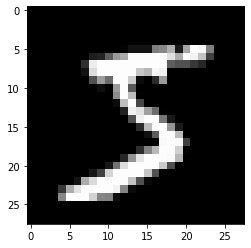

In [25]:
# Visualize an image by resizing it to original shape with matplotlib
single_image= pixel_values[0,:].reshape(28,28)
plt.imshow(single_image, cmap= 'gray')

- This step creates th t-SNE transformation of the data. We use only two components as we can visualize them well in a two dimensional setting
- *transformed_data*: 
  - The **t-SNE (t-distributed stochastic neighbor embedding)** algorithm is a dimension reduction technique for data visualization. 
  It is a non-linear method for representing a set of points in a large-dimensional space into a two- or three-dimensional space, the data can then be visualized with a point cloud. The t-SNE algorithm tries to find an optimal configuration according to an information theory criterion to respect the proximities between points: 
    - two points that are close (resp. distant) in the original space must be close (resp. distant) in the small dimensional space. 

In [26]:
# We create the tNSE
tsne= manifold.TSNE(n_components=2,
                    random_state= 42)

# We transform 3_000 out of the 70_000
transformed_data= tsne.fit_transform(pixel_values[:3000,:])

In [30]:
[print(x.shape) for x in [transformed_data, pixel_values[:3000,:]]]

(3000, 2)
(3000, 784)


[None, None]

In [33]:
# We make a dataframe from this transformed data
tsne_df= pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y","targets"]
)

tsne_df.loc[:,"targets"]= tsne_df.targets.astype(int)

In [43]:
tsne_df.head()

x        y  targets
0 -5.28155 -28.9528        5
1 -26.1059 -68.0693        0
2 -42.5036  35.5804        4
3   38.894  26.6634        1
4 -14.7706  35.4332        9

- By plotting the result of t-SNE, we can clearly see that there are different clusters. Each cluster represents a number from th mnist dataset.

In [45]:
# We can finally plot the final result in two dimensions to see how it looks like
grid= sns.FacetGrid(tsne_df, hue= 'targets', size= 8)
grid.map(plt.scatter, "x", "y").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
